# Text Classification with MLP (MultiLayer Perceptron) in Tensorflow Keras

MLP is defined as a Neural Network with at least one dense layer added in between. MLP is the most basic concept in Feed Forward Neural Network. Feed Forward Neural Network is simply the network where the direction of layer is one-way from input to output layers. 

MLP is useful in calssiciation model, but not so much in NLP model, as the length of the input is fixed (cannot be changed)

Here, we will use the texts_to_matrx() function in Keras to perform text-classification.  texts_to_matrx() function has 4 different modes: 'binary', 'count', 'freq', 'tfidf'.

## Classification of twenty e-mail newsgroup using Keras Text_to_matrix function 

# 1. Load Data

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sklearn offers 18,846 e-mails about 20 different news group. So we are going to use that for a learning.

In [2]:
newsdata = fetch_20newsgroups(subset = 'train') # 'subset = train' returns only train dataset

In [3]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
print('Number of e-mails in training set : {}'.format(len(newsdata.data)))

Number of e-mails in training set : 11314


In [5]:
print('Number of target classes : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

Number of target classes : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


We have 20 different classes in this classification task

In [6]:
# Convert data into Pandas Dataframe for easy handling
data = pd.DataFrame(newsdata.data, columns = ['email']) 
data['target'] = pd.Series(newsdata.target) # add target column
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


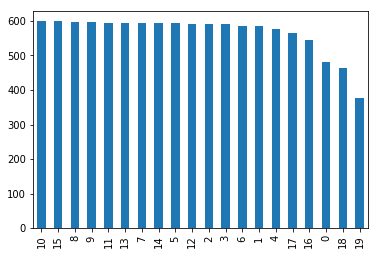

In [7]:
# Simple visualization on target classes
data['target'].value_counts().plot(kind='bar');

# 2. Splitting data into predictor/response for slotting into model, and also calling testset as well

In [8]:
train_email = data['email'] # predictor in training set
train_label = data['target'] # response in training set

newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) 
test_email = newsdata_test.data # predictor in test set
test_label = newsdata_test.target # response in training set

Set neccesary varialbes 
> max_words: number of maximum words that the models gonna get feed
> num_classes: number of labels

In [9]:
max_words = 10000 # Max number of word that we will input in training
num_classes = 20 

In [10]:
# Data preprocessing function
def prepare_data(train_data, test_data, mode):
    t = Tokenizer(num_words = max_words) # Use the number of words in 'max_words' 
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # matrix that has the size of "number of samples × max_words"
    X_test = t.texts_to_matrix(test_data, mode=mode) # matrix that has the size of "number of samples × max_words"
    return X_train, X_test, t.index_word

In [11]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # For now, let's use binary mode
y_train = to_categorical(train_label, num_classes) # One-hot encoding
y_test = to_categorical(test_label, num_classes) # One-hot encoding

In [16]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(11314, 10000)
(7532, 10000)
(11314, 20)
(7532, 20)


In [17]:
print('The 1st Frequent word : {}'.format(index_to_word[1]))
print('9999th Frequent word : {}'.format(index_to_word[9999]))

The 1st Frequent word : the
9999th Frequent word : mic


# 3. Use Multilayer Perceptron 

![imge]('./img/multilayerperceptron.png')

The image above shows the structure of the code below. There are 4 layers in total: Input layer that has the size of the max_words, first hidden layer with 256 neurons, second hidden layer with 128 neurons, and the output layer with the number of classes we want to predict. This network is called Deep Neural Networ (DNN) as it has more than one hidden layer 

In [18]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5)) # To prevent overfitting
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) # To prevent overfitting
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

# 4. Train the Model.

Let's get the result for all 4 available mode for text_to_matrix() 

In [19]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes: 
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # PreProcess data per each modes
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) 
    print(mode+' Test Accuacy:', score)

Epoch 1/5
80/80 [==============================] - 2s 21ms/step - loss: 2.2875 - accuracy: 0.3400 - val_loss: 0.9542 - val_accuracy: 0.8357
Epoch 2/5
80/80 [==============================] - 1s 18ms/step - loss: 0.8686 - accuracy: 0.7608 - val_loss: 0.4607 - val_accuracy: 0.8869
Epoch 3/5
80/80 [==============================] - 1s 18ms/step - loss: 0.4236 - accuracy: 0.8885 - val_loss: 0.3578 - val_accuracy: 0.9055
Epoch 4/5
80/80 [==============================] - 1s 18ms/step - loss: 0.2577 - accuracy: 0.9352 - val_loss: 0.3181 - val_accuracy: 0.9117
Epoch 5/5
80/80 [==============================] - 2s 21ms/step - loss: 0.1665 - accuracy: 0.9608 - val_loss: 0.2896 - val_accuracy: 0.9178
binary Test Accuacy: 0.8284652233123779
Epoch 1/5
80/80 [==============================] - 3s 43ms/step - loss: 2.7406 - accuracy: 0.2414 - val_loss: 1.5910 - val_accuracy: 0.7509
Epoch 2/5
80/80 [==============================] - 3s 34ms/step - loss: 1.4450 - accuracy: 0.6223 - val_loss: 0.7450 - v

Around 81~82% of accuracy accorss all modes, except 67% at 'freq' mode, which tells it's not a good algorithm to solve this problem